In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

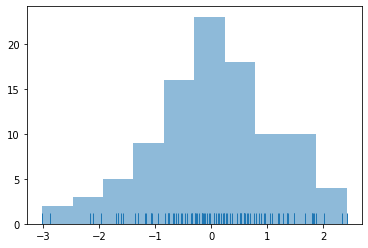

In [2]:
#1. manually create KDE by Summing the gaussian distribution

ds = randn(100)
sns.rugplot(ds)
plt.hist(ds,alpha=0.5)
plt.savefig('KDEimage1.png')

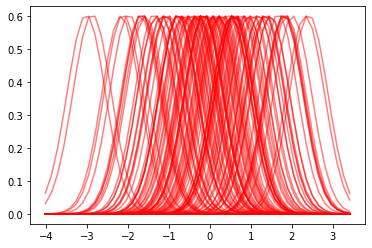

In [6]:
#linspace-Return evenly spaced numbers over a specified interval
x_axes = np.linspace(ds.min()-1,ds.max()+1,50)

#bandwith creation - using rule-of-thump bandwidth estimator
bandwith = ((4*ds.std()**5)/(3*len(ds))) ** 0.2

kernels = []
for point in ds:  
    kernel = stats.norm(point,bandwith).pdf(x_axes)
    kernels.append(kernel)

    kernel = kernel / kernel.max()
    kernel = kernel * 0.6
    
    plt.plot(x_axes,kernel,alpha=0.5,color="red")

plt.savefig('KDEimage2.png')

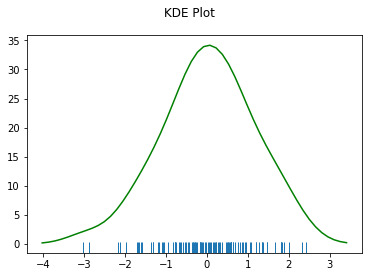

In [7]:
kde = np.sum(kernels,axis=0)
kde_fig = plt.plot(x_axes,kde,color='green')
sns.rugplot(ds)
plt.suptitle('KDE Plot')
plt.savefig('KDEimage3.png')

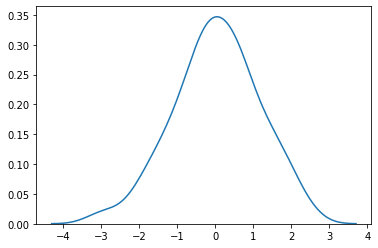

In [8]:
#2. Using Seaborn - shortcut

kdefig = sns.kdeplot(ds)
fig = kdefig.get_figure()
fig.savefig('KDEimage4.png')

## KDE for Multivariable

In [9]:
mean = [0,0]
covariance = [[1,0],[0,100]]

#A multi dimension matrix
ds = np.random.multivariate_normal(mean,covariance,500)

dframe = pd.DataFrame(ds, columns=['col1','col2'])

C:\Users\DELL INSPIRON 14\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


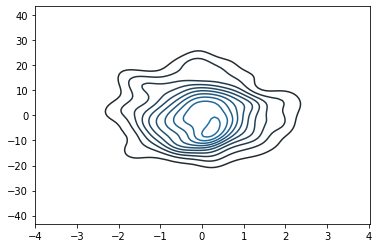

In [10]:
fig = sns.kdeplot(dframe).get_figure()
fig.savefig('kde1.png')

C:\Users\DELL INSPIRON 14\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


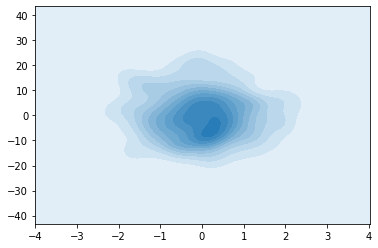

In [11]:
#shade
fig2 = sns.kdeplot(dframe, shade=True).get_figure()
fig2.savefig('kde2.png')

C:\Users\DELL INSPIRON 14\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


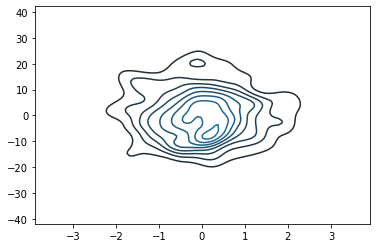

In [12]:
#bandwith change
fig3 = sns.kdeplot(dframe,bw='silverman').get_figure()
fig3.savefig('kde3.png')

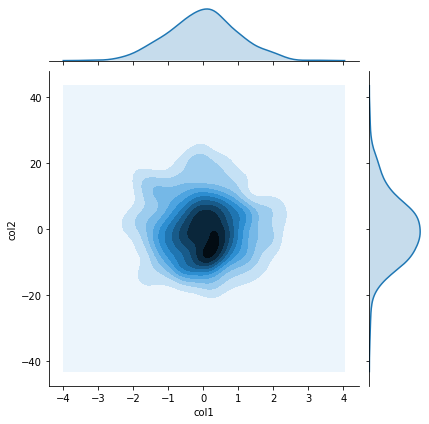

In [13]:
#kind variable
fig4 = sns.jointplot('col1','col2',dframe,kind='kde')
fig4.savefig('kde4.png')